# 5.4: Ensembling

In this short notebook we discuss the the underlying framework for performing nonlinear machine learning.  This includes an introduction / comparison of kernels, neural networks, and decision trees, along with many demonstrations involving threse three algorithms.

>The content of this notebook is supplementary material for the textbook Machine Learning Refined (Cambridge University Press, 2016). Visit http://www.mlrefined.com for free chapter downloads and tutorials, and [our Amazon site here](https://www.amazon.com/Machine-Learning-Refined-Foundations-Applications/dp/1107123526/ref=sr_1_1?ie=UTF8&qid=1474491657&sr=8-1&keywords=machine+learning+refined) for details regarding a hard copy of the text.

# I.  Which basis should I use?

Now that we have seen a number of bases for use for nonlinear supervised learning, how do we decide which one to pick for a given problem?  There  are no clear cut answers for an arbitrary dataset, and for such a case one typically tries several different bases (fitting each via cross-validation) and chooses the best performer.  

Thankfully for certain types of data there are specific guidelines one can follow based on two general criteria

- our understanding of each type of basis (i.e., if a given basis is locally defined as with trees versus globally defined such as fixed basis kernels and neural nets)


- our understanding of a given data type, often largely based on the hard work and experiments of our predecessors and colleagues


Here we briefly discuss a few general guidelines based on these two criteria.

## 1.  Does the structure of the data / target function match one type of basis more than others?

Suppose that our dataset is large enough (and reasonably noise-free) that we can trust it faithfully represents the underlying target function well.  Then - speaking generally - the basis in which this target function most naturally lies is the most appriorate choice (and so will represent the data most effectively).

For example, examine the dataset in the next panel.  These points were generated as noisy samples from a sine wave - the target function (shown in dashed red).  In the subsequent cells you can play with fitting a polynomial, neural network, and tree basis respectively to this dataset.  

Choose the slider-value for each basis type so as to get the best approximation of the target function (in dashed-red).

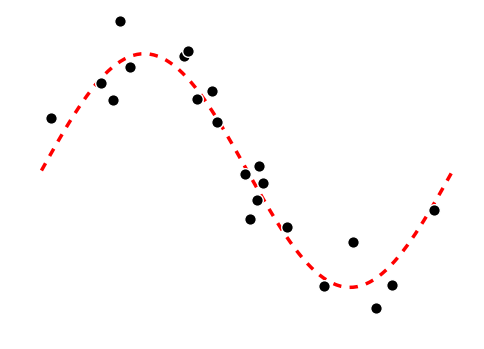

In [16]:
from Data_Fit_Demo1 import Fit_Bases
%matplotlib inline
data_fit = Fit_Bases()
data_fit.load_data('demo_datasets/noisy_sin_sample.csv')
data_fit.load_target('demo_datasets/sin_function.csv')
data_fit.plot_all()

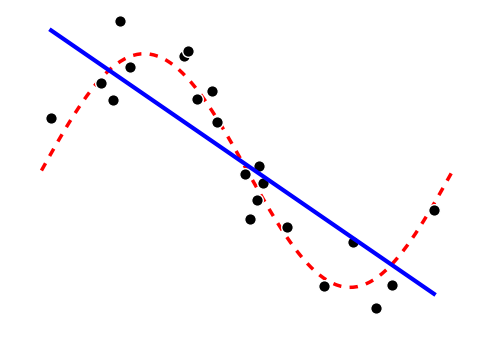

In [17]:
# adjust the slider value to choose the number of polynomial elements to use in the approximation
data_fit.browse_poly_fit()

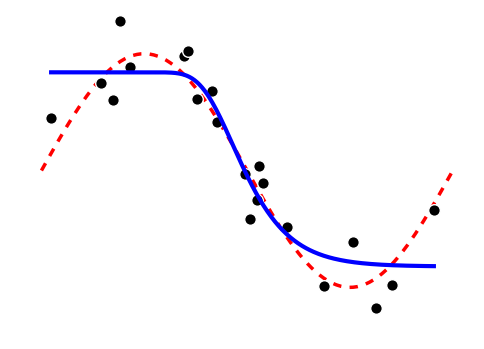

In [18]:
# adjust the slider value to choose the number of neural net elements to use in the approximation
data_fit.browse_net_fit()

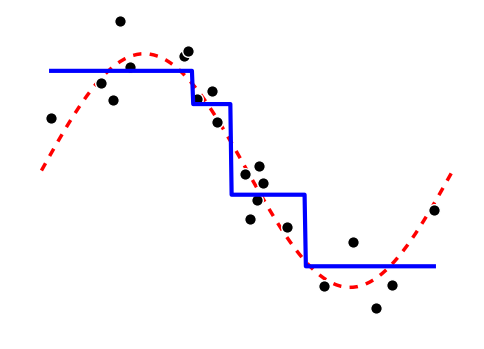

In [19]:
# adjust the slider value to choose the number of trees to use in the approximation
data_fit.browse_tree_fit()

By adjusting each of the sliders, you can see that in this specific instance polynomials provide the best approximation to the target function.  This is because they most naturally approximate the target function (a sine wave) itself, and the dataset is large (and noise-free) enough to represent the target well.

Another example can be seen in the next Python cell.  Here we have generated a dataset based on an underlying sum of tree basis elements.  Once again you can adjust sliders to try to find the best fit for polynomial, neural network, and tree basis elements.  

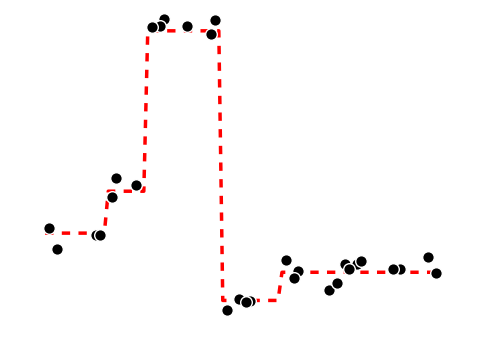

In [20]:
# import class for visualizing complete supervised learning (i.e., noisy sampled function approximation)
from Data_Fit_Demo1 import Fit_Bases
%matplotlib inline
data_fit = Fit_Bases()
data_fit.load_data('demo_datasets/steppy_data.csv')
data_fit.load_target('demo_datasets/steppy_func.csv')
data_fit.plot_all()

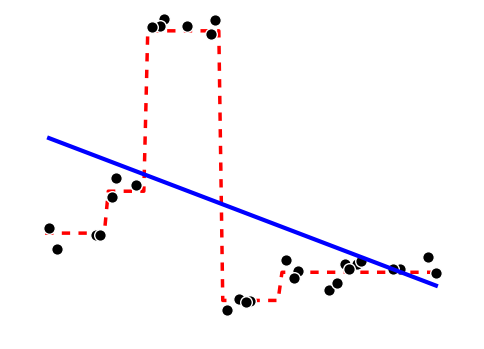

In [21]:
# adjust the slider value to choose the number of polynomial elements to use in the approximation
data_fit.browse_poly_fit()

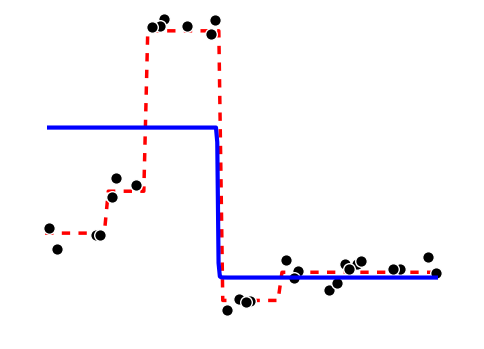

In [22]:
# adjust the slider value to choose the number of neural net elements to use in the approximation
data_fit.browse_net_fit()

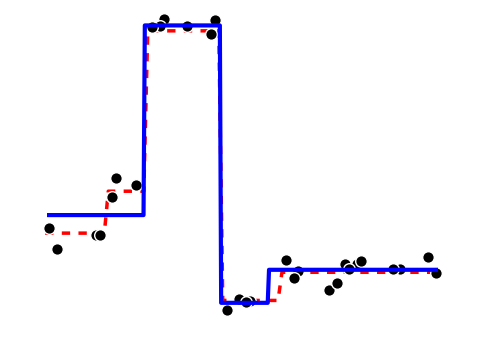

In [23]:
# adjust the slider value to choose the number of trees to use in the approximation
data_fit.browse_tree_fit()

Clearly when tuned properly the tree basis provides the best fit to the target function.  This is not too surprising given how we generated the data!

These are just two toy examples, but they illustrate the point.  Some bases work better than others with specific types of data because these bases better approximate the target function underlying this data.

Some real examples where this occurs: 


-  tree bases tend to work very well for metadata - or data with categorical (and continuous) data


-  neural network bases are often gainfully employed with image and audio data


-  polynomial and other fixed bases (like periodic Fourier bases, consisting of sine waves of varying frequencies / phases) tend to work well in physics and engineering applications


-  neural network and Fourier bases are often a excellent for approximating periodic phenomenon often found in time series

##  2.   Practical considerations

Practical considerations can also guide the choice of basis type.

### Computation time (for training)
Foremost among these considerations is *training computation time*.  In general, deep networks take considerable more computation time to fit (or train) than do trees (which are typically fit via a greedy method as opposed to more traditional schemes like gradient descent). 

### Engineering effort
Another general consideration: the amount of engineering involved in effectively employing a kernelized form of a fixed basis (see Chapter 7 of the book for further details) or a deep neural network (e.g., choosing the number of hidden layers/hidden units/activation function) can also guide the choice of basis in practice.

### Global versus local behavior
Another question to ask is whether or not the phenomenon you're dealing with is *globally or locally* defined.  That is, is the underlying target function defined for large swaths of the input space, or a fairly small region?  

A related question: will the input to future predictions be within the space of the original data (e.g., census data and other metadata sources), or outside of it (e.g., timeseries, various detection problems)?

This helps guide the choice of basis, as some (e.g., trees) consist of locally defined functions, i.e., functions that are only defined over the space of your original data.  Because of this they will often evaluate to a trivial value on new input lying outside the space of the data on which they are trained.

Fixed kernel bases and neural nets, on the other hand, consist of globally defined basis functions.  That is, functions that are defined for every possible input in the space.  Thus if a prediction is required for inputs lying outside the region of the original data, such a globally defined basis is likely preferred (so that you have at least a chance of making an accurate prediction).

### Specific problems
As for a specific example, suppose that given the nature of a dataset's input variable it does not make sense to normalize its values to lie in the range [0,1].  Then polynomials can be a very poor choice of basis/features. This is due to the fact that polynomials grow rapidly for values outside this range e.g., x20 = 1, 048, 576 when x = 2, making the corresponding (closed form) calculations for solving the Least Squares problem difficult if not impossible to perform on a modern computer. 